In [ ]:


import numpy as np 
import pandas as pd 


import os
for dirname, _, filenames in os.walk('/sys/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/face-mask-dataset/data/without_mask/without_mask_3248.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_2803.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_650.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_2060.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_559.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_3273.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_124.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_1849.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_139.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_2137.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_2438.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_553.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_2661.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_966.jp

# Importing the Dependencies

In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [3]:
with_mask_files = os.listdir(r'/sys/input/face-mask-dataset/data/with_mask/')

In [4]:
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_3326.jpg', 'with_mask_3139.jpg', 'with_mask_696.jpg', 'with_mask_2867.jpg', 'with_mask_39.jpg']
['with_mask_502.jpg', 'with_mask_110.jpg', 'with_mask_3205.jpg', 'with_mask_1863.jpg', 'with_mask_2020.jpg']


In [5]:
without_mask_files = os.listdir(r'/sys/input/face-mask-dataset/data/without_mask/')

In [6]:
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_3248.jpg', 'without_mask_2803.jpg', 'without_mask_650.jpg', 'without_mask_2060.jpg', 'without_mask_559.jpg']
['without_mask_3215.jpg', 'without_mask_2934.jpg', 'without_mask_2572.jpg', 'without_mask_1906.jpg', 'without_mask_2551.jpg']


In [7]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


# Creating Labels for the two class of Images

with mask --> 1

without mask --> 0

In [8]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [9]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [10]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [11]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


# Displaying the Images

Displaying with mask image :



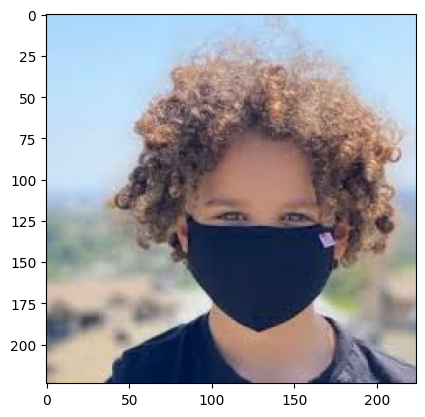

In [12]:
img = mpimg.imread(r"/sys/input/face-mask-dataset/data/with_mask/with_mask_767.jpg")
imgplot = plt.imshow(img)
plt.show()

Displaying without image :

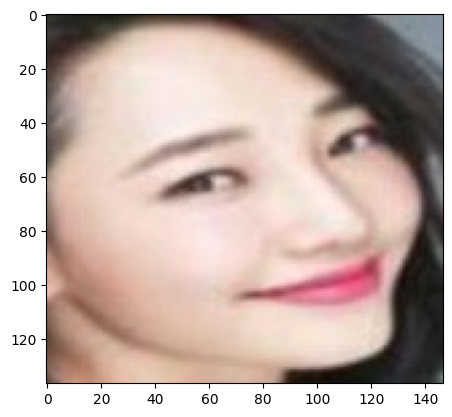

In [13]:
img_no_mask = mpimg.imread(r"/sys/input/face-mask-dataset/data/without_mask/without_mask_246.jpg")

imgplot_no_mask = plt.imshow(img_no_mask)

plt.show()

# Image Processing

1. Resize the Images

2. Convert the images to numpy arrays

In [14]:
with_mask_path =r'/sys/input/face-mask-dataset/data/with_mask/'

data = []


for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


without_mask_path =r'/sys/input/face-mask-dataset/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [15]:
type(data)


list

In [16]:
len(data)

7553

In [17]:
data[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [254, 254, 254],
        [253, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [252, 253, 254],
        [246, 139, 136],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [212, 175, 154],
        [218, 187, 172],
        [250, 247, 245]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [212, 175, 154],
        [220, 191, 175],
        [252, 250, 248]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [211, 174, 155],
        [219, 194, 180],
        [252, 251, 250]]

In [18]:
type(data[0])


numpy.ndarray

In [19]:
data[0].shape

(128, 128, 3)

# converting image list and label list to numpy arrays :


In [20]:
X = np.array(data)
Y = np.array(labels)

In [21]:
type(X)

numpy.ndarray

In [22]:
type(Y)

numpy.ndarray

In [23]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [24]:
print(Y)

[1 1 1 ... 0 0 0]


# Train Test split

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [26]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [27]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [28]:
X_train[0]

array([[[48, 48, 60],
        [43, 43, 54],
        [36, 36, 46],
        ...,
        [92, 77, 70],
        [93, 79, 72],
        [94, 81, 73]],

       [[48, 48, 60],
        [43, 43, 55],
        [36, 36, 46],
        ...,
        [92, 77, 70],
        [93, 79, 71],
        [94, 81, 73]],

       [[45, 45, 57],
        [38, 38, 49],
        [31, 31, 41],
        ...,
        [94, 79, 74],
        [93, 78, 72],
        [93, 78, 71]],

       ...,

       [[15, 16, 21],
        [15, 16, 21],
        [16, 17, 22],
        ...,
        [16, 17, 21],
        [17, 18, 22],
        [17, 18, 22]],

       [[14, 15, 20],
        [14, 15, 20],
        [15, 16, 21],
        ...,
        [17, 18, 22],
        [17, 18, 22],
        [17, 18, 22]],

       [[14, 15, 20],
        [14, 15, 20],
        [15, 16, 21],
        ...,
        [18, 19, 23],
        [19, 20, 24],
        [19, 20, 24]]], dtype=uint8)

In [29]:
X_train_scaled[0]

array([[[0.18823529, 0.18823529, 0.23529412],
        [0.16862745, 0.16862745, 0.21176471],
        [0.14117647, 0.14117647, 0.18039216],
        ...,
        [0.36078431, 0.30196078, 0.2745098 ],
        [0.36470588, 0.30980392, 0.28235294],
        [0.36862745, 0.31764706, 0.28627451]],

       [[0.18823529, 0.18823529, 0.23529412],
        [0.16862745, 0.16862745, 0.21568627],
        [0.14117647, 0.14117647, 0.18039216],
        ...,
        [0.36078431, 0.30196078, 0.2745098 ],
        [0.36470588, 0.30980392, 0.27843137],
        [0.36862745, 0.31764706, 0.28627451]],

       [[0.17647059, 0.17647059, 0.22352941],
        [0.14901961, 0.14901961, 0.19215686],
        [0.12156863, 0.12156863, 0.16078431],
        ...,
        [0.36862745, 0.30980392, 0.29019608],
        [0.36470588, 0.30588235, 0.28235294],
        [0.36470588, 0.30588235, 0.27843137]],

       ...,

       [[0.05882353, 0.0627451 , 0.08235294],
        [0.05882353, 0.0627451 , 0.08235294],
        [0.0627451 , 0

# Building a Convolutional Neural Networks (CNN)**


In [30]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

# compile the neural network

In [31]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

# training the neural network

In [32]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 83s 479ms/step - loss: 0.4536 - acc: 0.8049 - val_loss: 0.2284 - val_acc: 0.9140
Epoch 2/5
170/170 [==============================] - 80s 469ms/step - loss: 0.3018 - acc: 0.8788 - val_loss: 0.2250 - val_acc: 0.9273
Epoch 3/5
170/170 [==============================] - 82s 480ms/step - loss: 0.2434 - acc: 0.8970 - val_loss: 0.1825 - val_acc: 0.9306
Epoch 4/5
170/170 [==============================] - 79s 467ms/step - loss: 0.2122 - acc: 0.9150 - val_loss: 0.1568 - val_acc: 0.9471
Epoch 5/5
170/170 [==============================] - 80s 468ms/step - loss: 0.1841 - acc: 0.9222 - val_loss: 0.2133 - val_acc: 0.9223


# Model Evaluation

In [33]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 6s 119ms/step - loss: 0.3097 - acc: 0.9120
Test Accuracy = 0.9119788408279419


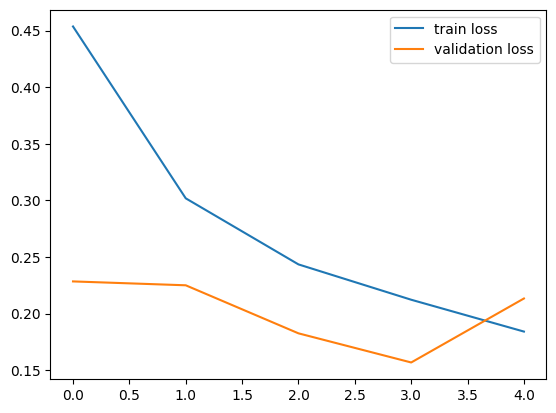

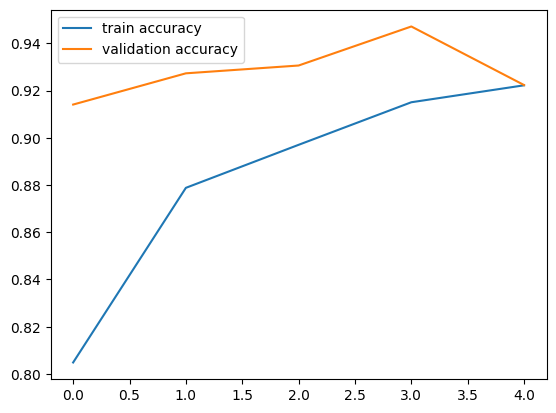

In [34]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

# Predictive System

1/1 [==============================] - 0s 151ms/step
[[0.4783534 0.5338667]]
1
The person in the image is wearing a mask


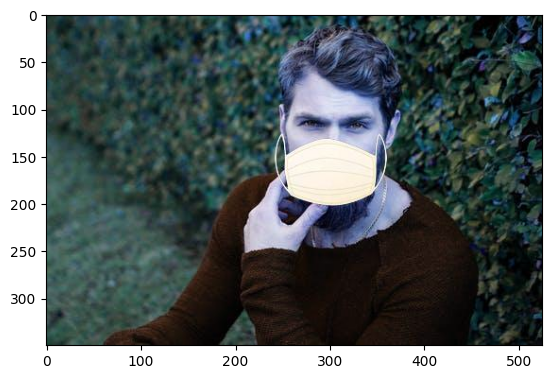

In [35]:
input_image_path =r'/kaggle/input/face-mask-dataset/data/with_mask/with_mask_1.jpg'

input_image = cv2.imread(input_image_path)

plt.imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')